# Часть 1: ИССЛЕДОВАНИЕ

1. Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах (1 балл).
2. Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).
3. Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест $χ^2$, ANOVA (2 балла).
4. Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей? (1 балл)
5. Увеличить размер данных простым дублированием до `1_000_000` строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:
* загрузка данных (1 балл)
* фильтрация данных (1 балл)
* агрегация данных (1 балл)

In [1]:
import warnings

# Игнорирование FutureWarning и UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ABALONE_DATASET = "https://github.com/aiedu-courses/eda_and_dev_tools/blob/main/datasets/abalone.csv"

<h1> Datasets Descriptions Abalone</h1>
<h2>Predict the age of abalone from physical measurements</h2>

`Sex` - nominal - M, F, and I (infant)

`Length` - continuous - mm - Longest shell measurement

`Diameter` - continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` - integer - +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [4]:
from pathlib import Path
df = pd.read_csv("https://github.com/aiedu-courses/eda_and_dev_tools/raw/main/datasets/abalone.csv")

<h2>1. Общее исследование данных</h2>

In [5]:
#проверка на наличие ошибочных столбцов в sex
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

In [6]:
#изменяем ошибочный столбец f на F
df['Sex'] = df['Sex'].replace('f', 'F')

In [7]:
#меняем тип столбца sex, тк он категоральный
df['Sex'] = df['Sex'].astype('category')

In [8]:
#размерность
df.shape

(4177, 9)

In [9]:
#подробная информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4078 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4078 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4127 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [10]:
#полезные значения числовых типов
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# # Функция для вычисления выбросов
# def calculate_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = series[(series < lower_bound) | (series > upper_bound)]
#     return outliers

# # Словарь для хранения выбросов
# outliers_dict = {}

# # Вычисляем выбросы для каждого числового столбца
# for column in numeric_columns:
#     outliers = calculate_outliers(df[column])
#     outliers_dict[column] = outliers

# # Выводим результаты
# for column, outliers in outliers_dict.items():
#     print(f'Выбросы для {column}:')
#     print(outliers)
#     print()

In [12]:
#полезные значения категоральных типов
df.describe(include='category')

,Sex
count,4177
unique,3
top,F
freq,1454


In [13]:
#поиск дупликатов
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


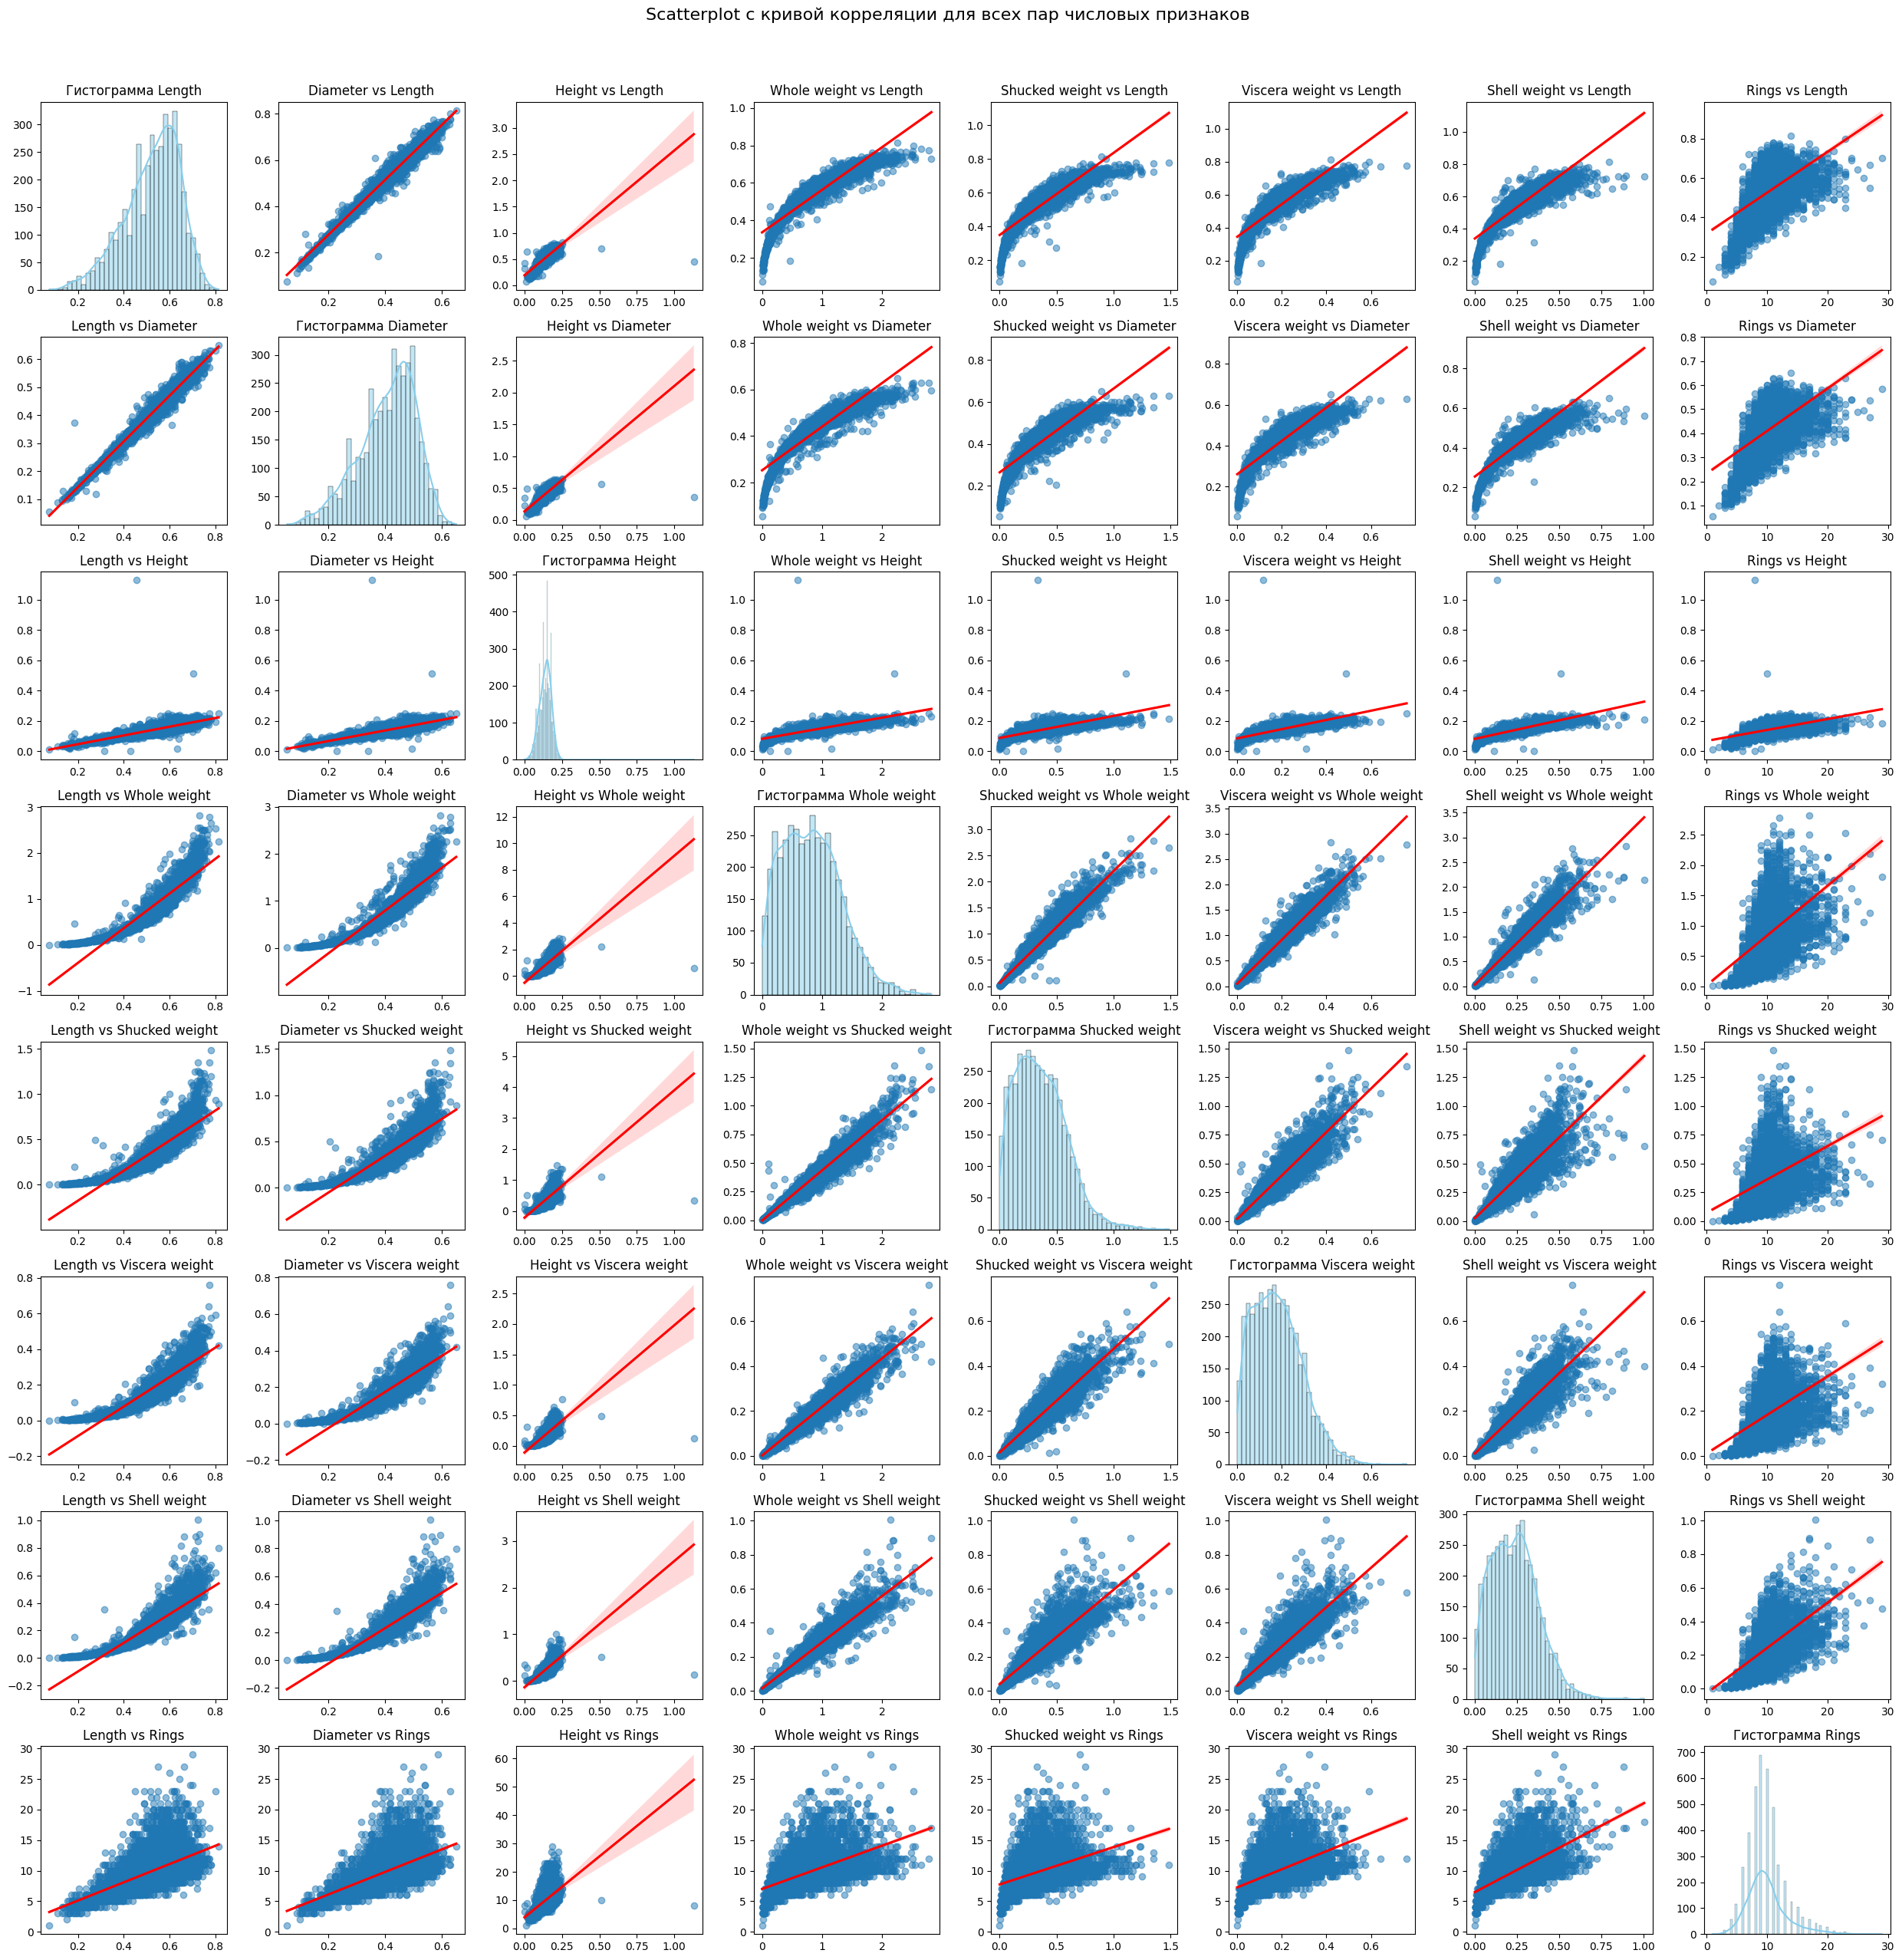

In [14]:
# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Определение размеров сетки
rows = num_cols
cols = num_cols

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))
fig.suptitle('Scatterplot с кривой корреляции для всех пар числовых признаков', y=1.02, fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Построение scatterplot с линией корреляции
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]
        if i == j:
            # Диагональ - гистограмма для каждого признака
            sns.histplot(df[col1], ax=ax, kde=True, color='skyblue')
            ax.set_title(f'Гистограмма {col1}')
        else:
            # Scatterplot с линией регрессии
            sns.regplot(x=df[col2], y=df[col1], ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
            ax.set_title(f'{col2} vs {col1}')
        ax.set_xlabel('')
        ax.set_ylabel('')

# Улучшение компоновки
plt.tight_layout()
plt.show()

## Вывод по scatterplot с кривой корреляции для всех пар числовых признаков
* 60% имеют линейную зависимость
* 20% - квадратичную
* оставшиеся - околоквадратичную

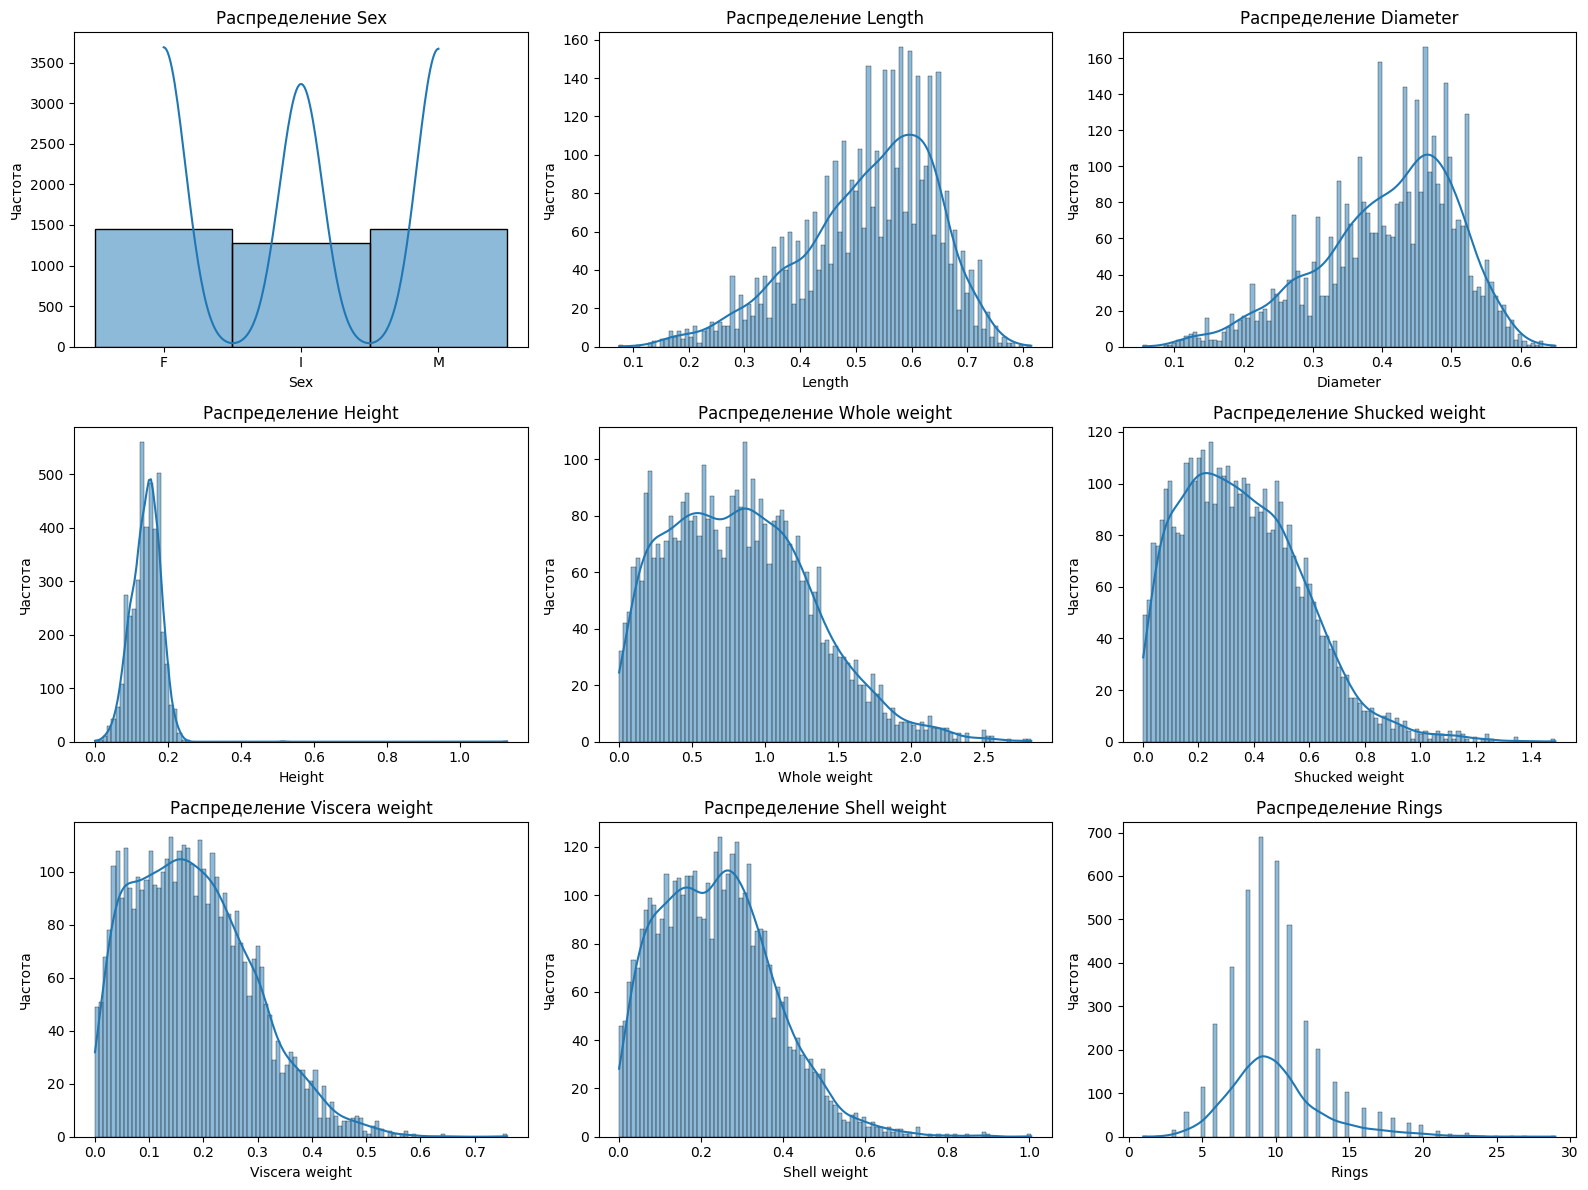

In [15]:
#постоим гистограмму с плотностью распределения для каждого столбца

# for cols in df:
#     plt.figure(figsize=(4,3))
#     sns.histplot(df[cols], bins=100, kde=True);
#     plt.xlabel(cols)


# Количество столбцов для визуализации
columns = df.columns
num_cols = len(columns)

# Определение размеров сетки
rows = (num_cols + 2) // 3  # Вычисляем количество строк (3 графика в строке)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 4))
axes = axes.flatten()  # Разворачиваем массив подграфиков в 1D для итерации

# Построение графиков
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=100, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаление пустых подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая подгонка макета
plt.show()

# Вывод по графикам распределений
* 50% имеют нормальное распределение
* 40 % - логнормальное
* остальное - равномерное

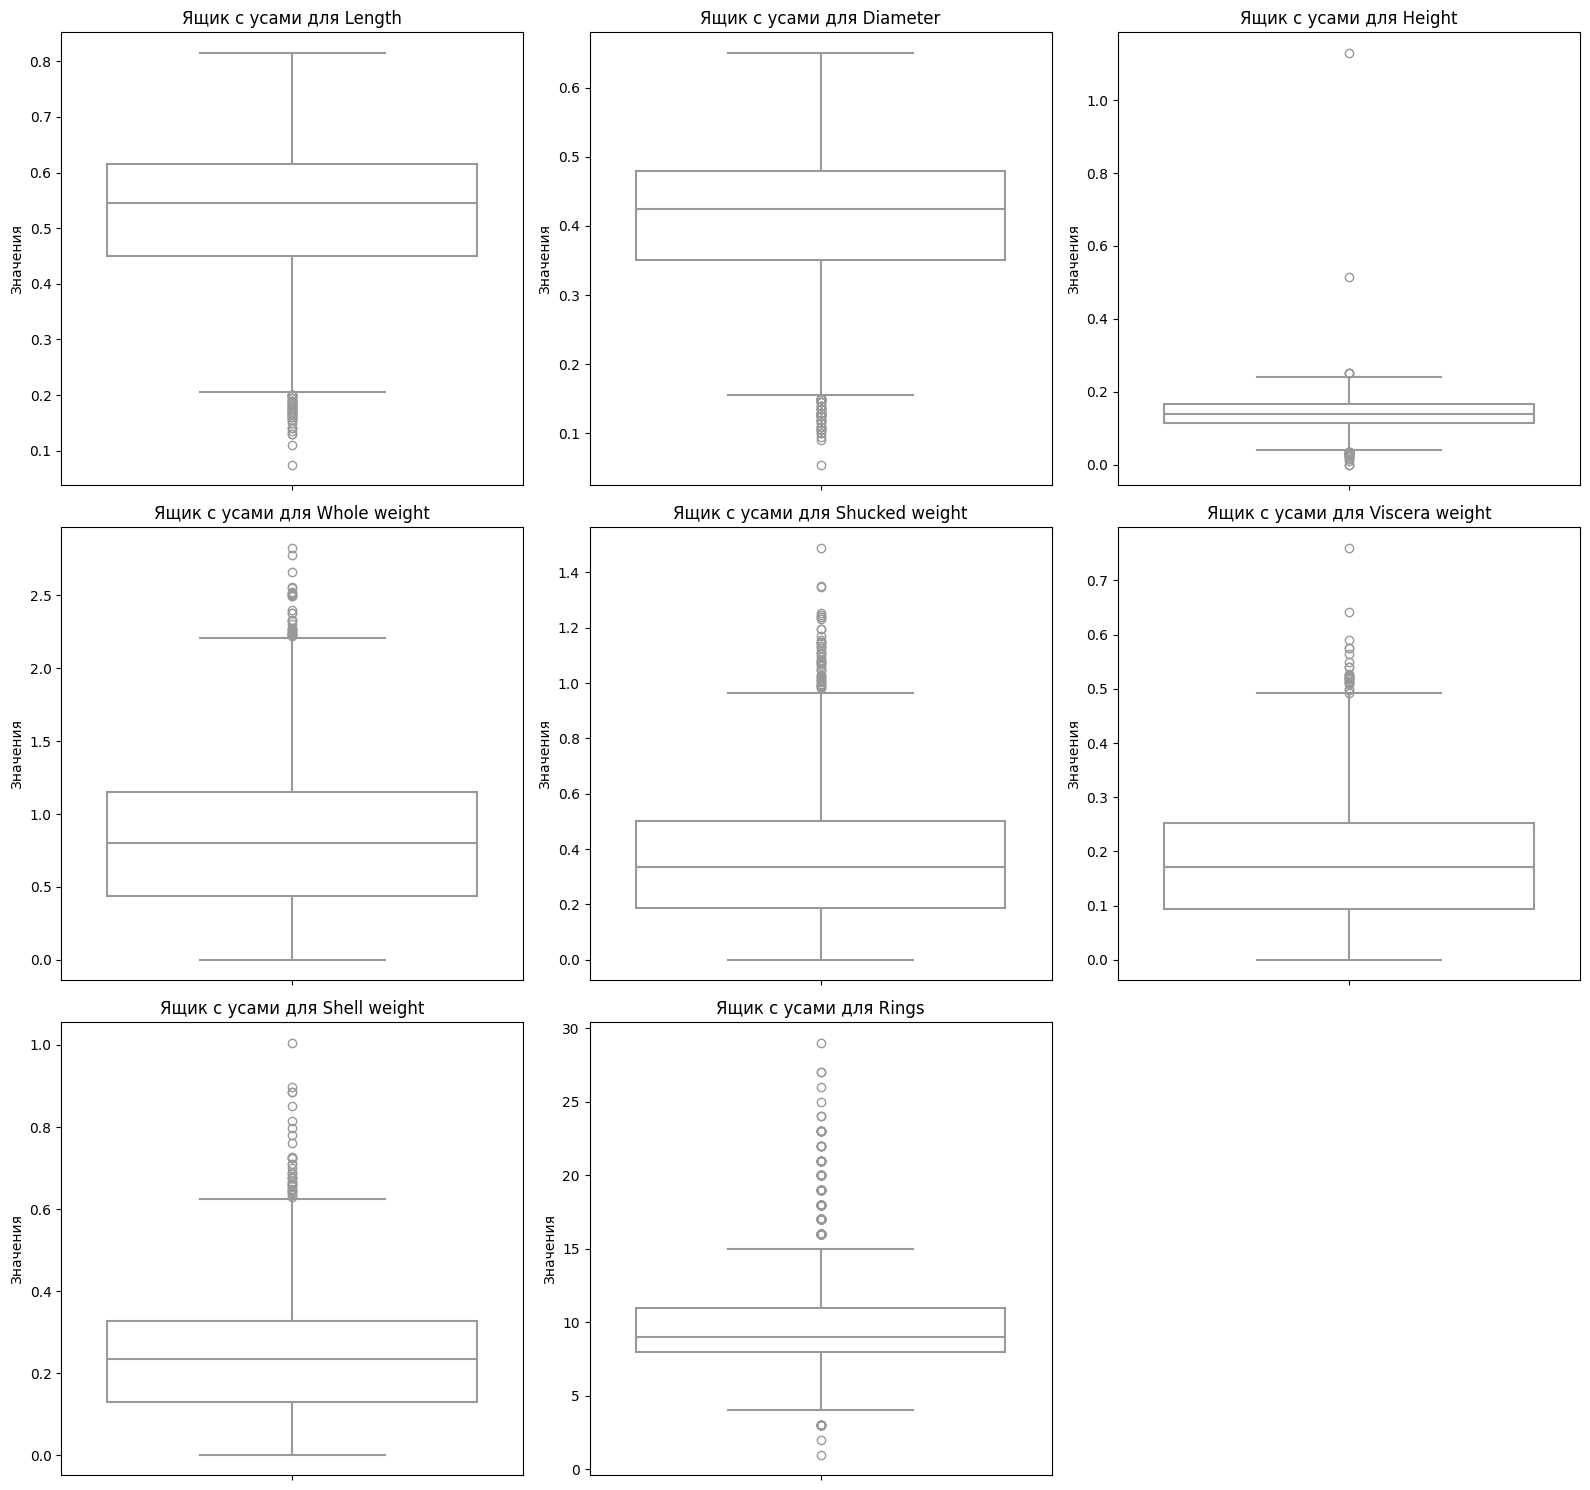

In [16]:
# Построение ящика с усами для каждого числового признака отдельно

# numeric_columns = df.select_dtypes(include=['number']).columns
# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df.boxplot(column=column)
#     plt.title(f'Ящик с усами для {column}')
#     plt.ylabel('Значения')
#     plt.grid(axis='y')
#     plt.show()

# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns

# Определение размеров сетки
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3  # Количество строк (3 графика на строку)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))
axes = axes.flatten()

# Построение boxplot для каждого числового признака без заливки
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='white', linewidth=1.5)
    axes[i].set_title(f'Ящик с усами для {column}')
    axes[i].set_ylabel('Значения')

# Удаление лишних осей
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Улучшение компоновки графиков
plt.tight_layout()
plt.show()

# Вывод по ящику с усами
| Столбец | Кол-во выбросов |
| --- | --- |
| Length | 49 |
| Diameter | 58 |
| Height | 29 |
| Whole weight | 29 |
| Shucked weight | 48 |
| Viscera weight | 26 |
| Shell weight | 35 |
| Rings | 278 |

Столбец 'Length': 49 значений вынесено в хвосты.
Столбец 'Diameter': 58 значений вынесено в хвосты.
Столбец 'Height': 29 значений вынесено в хвосты.
Столбец 'Whole weight': 29 значений вынесено в хвосты.
Столбец 'Shucked weight': 48 значений вынесено в хвосты.
Столбец 'Viscera weight': 26 значений вынесено в хвосты.
Столбец 'Shell weight': 35 значений вынесено в хвосты.
Столбец 'Rings': 278 значений вынесено в хвосты.


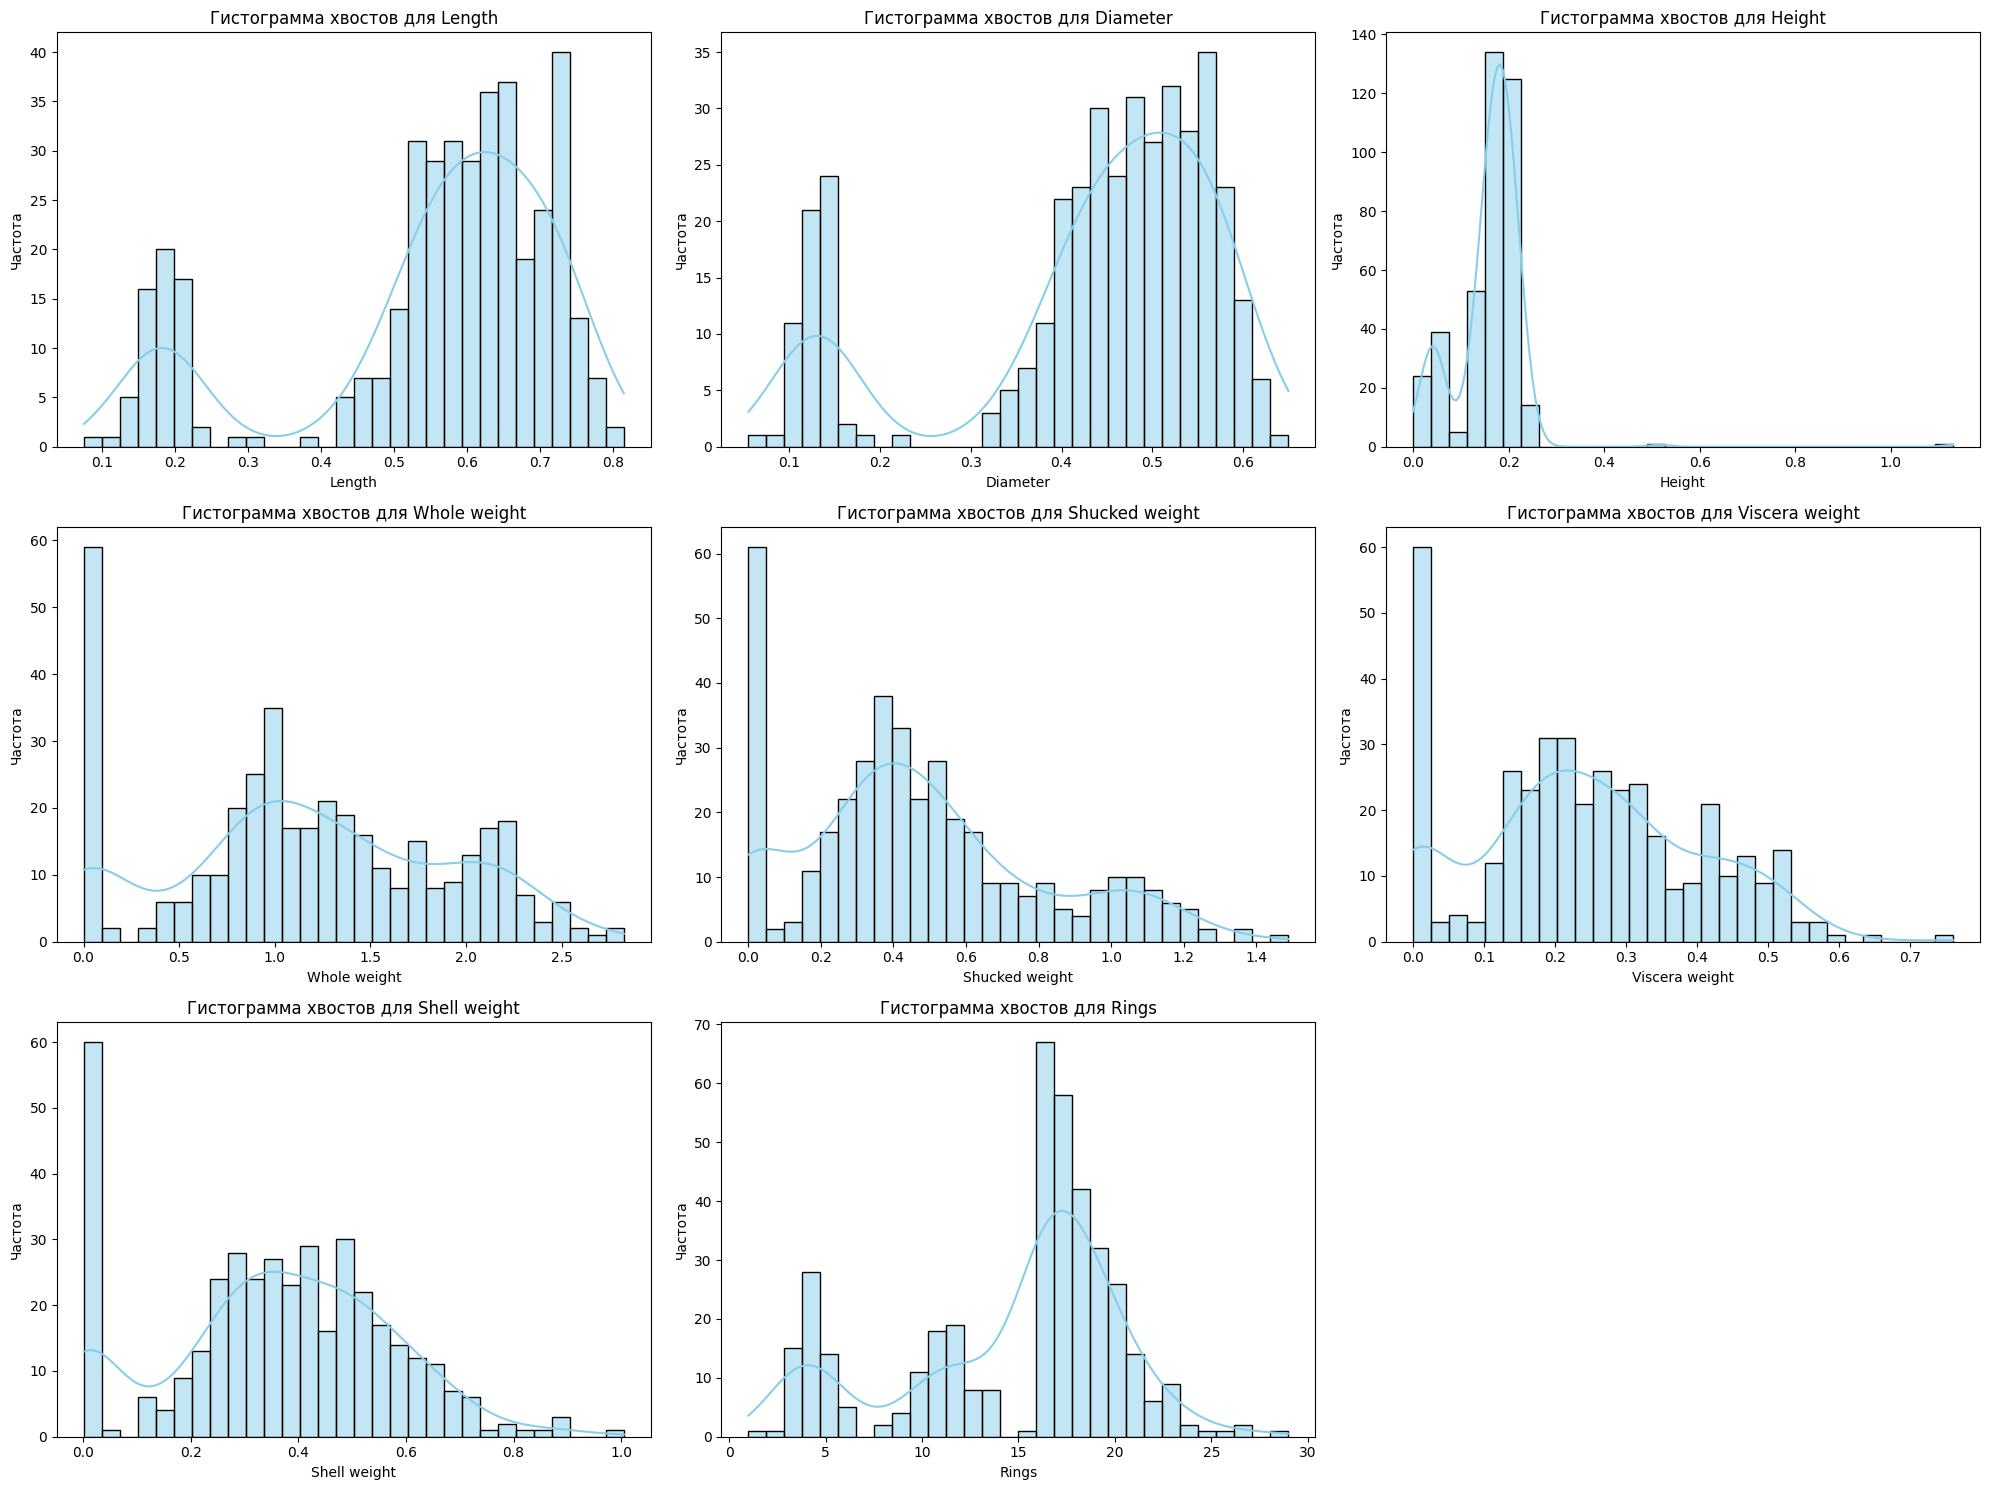

In [17]:
# Выбор всех числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns

# Создаем пустой DataFrame для хранения хвостов
tails_df = pd.DataFrame()

# Вынос хвостов на основе IQR для всех числовых признаков
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # 25-й процентиль
    Q3 = df[col].quantile(0.75)  # 75-й процентиль
    IQR = Q3 - Q1  # Межквартильный размах

    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

    # Фильтруем хвосты
    tail_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Добавляем хвосты в отдельный DataFrame
    tails_df = pd.concat([tails_df, tail_rows])

    print(f"Столбец '{col}': {len(tail_rows)} значений вынесено в хвосты.")

# Удаляем дубликаты строк, если одна строка попала в хвосты для нескольких столбцов
tails_df = tails_df.drop_duplicates()

# Построение гистограмм для всех числовых признаков с выбросами
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)
    sns.histplot(tails_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма хвостов для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()



# Выводы по гистограммам хвостов:
## Length
>1. Наблюдаются выбросы с обеих сторон распределения.
>2. Хвосты справа более протяженные, что указывает на асимметричность данных.
## Diameter
>1. Выбросы распределены в основном в верхней части.
>2. Данные близки к нормальному распределению, но правый хвост выделяется сильнее.
## Height
>1. Присутствуют выбросы в правом хвосте.
>2. Большинство значений сосредоточено в нижней части, распределение сильно скошено вправо.
## Whole weight
>1. Значительная часть выбросов находится в верхнем диапазоне.
>2. Распределение имеет длинный правый хвост, что указывает на тяжелую правую сторону.
## Shucked weight
>1. Наблюдается асимметрия и выбросы как в начале, так и в правом хвосте.
>2. Данные содержат значительное количество точек на верхнем конце распределения.
## Viscera weight
>1. Распределение показывает наличие выбросов справа.
>2. Асимметрия в данных смещена в правую сторону, где значения более редкие.
## Shell weight
>1. Аналогично другим весовым признакам, есть длинный правый хвост с выбросами.
>2. Основные значения сконцентрированы в нижней половине распределения.
## Rings
>1. Значительное количество выбросов наблюдается в верхней части.
>2. Хвосты длинные и асимметричные, что указывает на разброс значений и возможное влияние редких случаев на метрику.

In [18]:
tails_df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
148,I,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,I,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,F,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3


<h2>2. Однофакторный анализ</h2>

Box-Cox применен к Length
Yeo-Johnson применен к Diameter
Yeo-Johnson применен к Height
Yeo-Johnson применен к Whole weight
Box-Cox применен к Shucked weight
Box-Cox применен к Viscera weight
Yeo-Johnson применен к Shell weight
Box-Cox применен к Rings


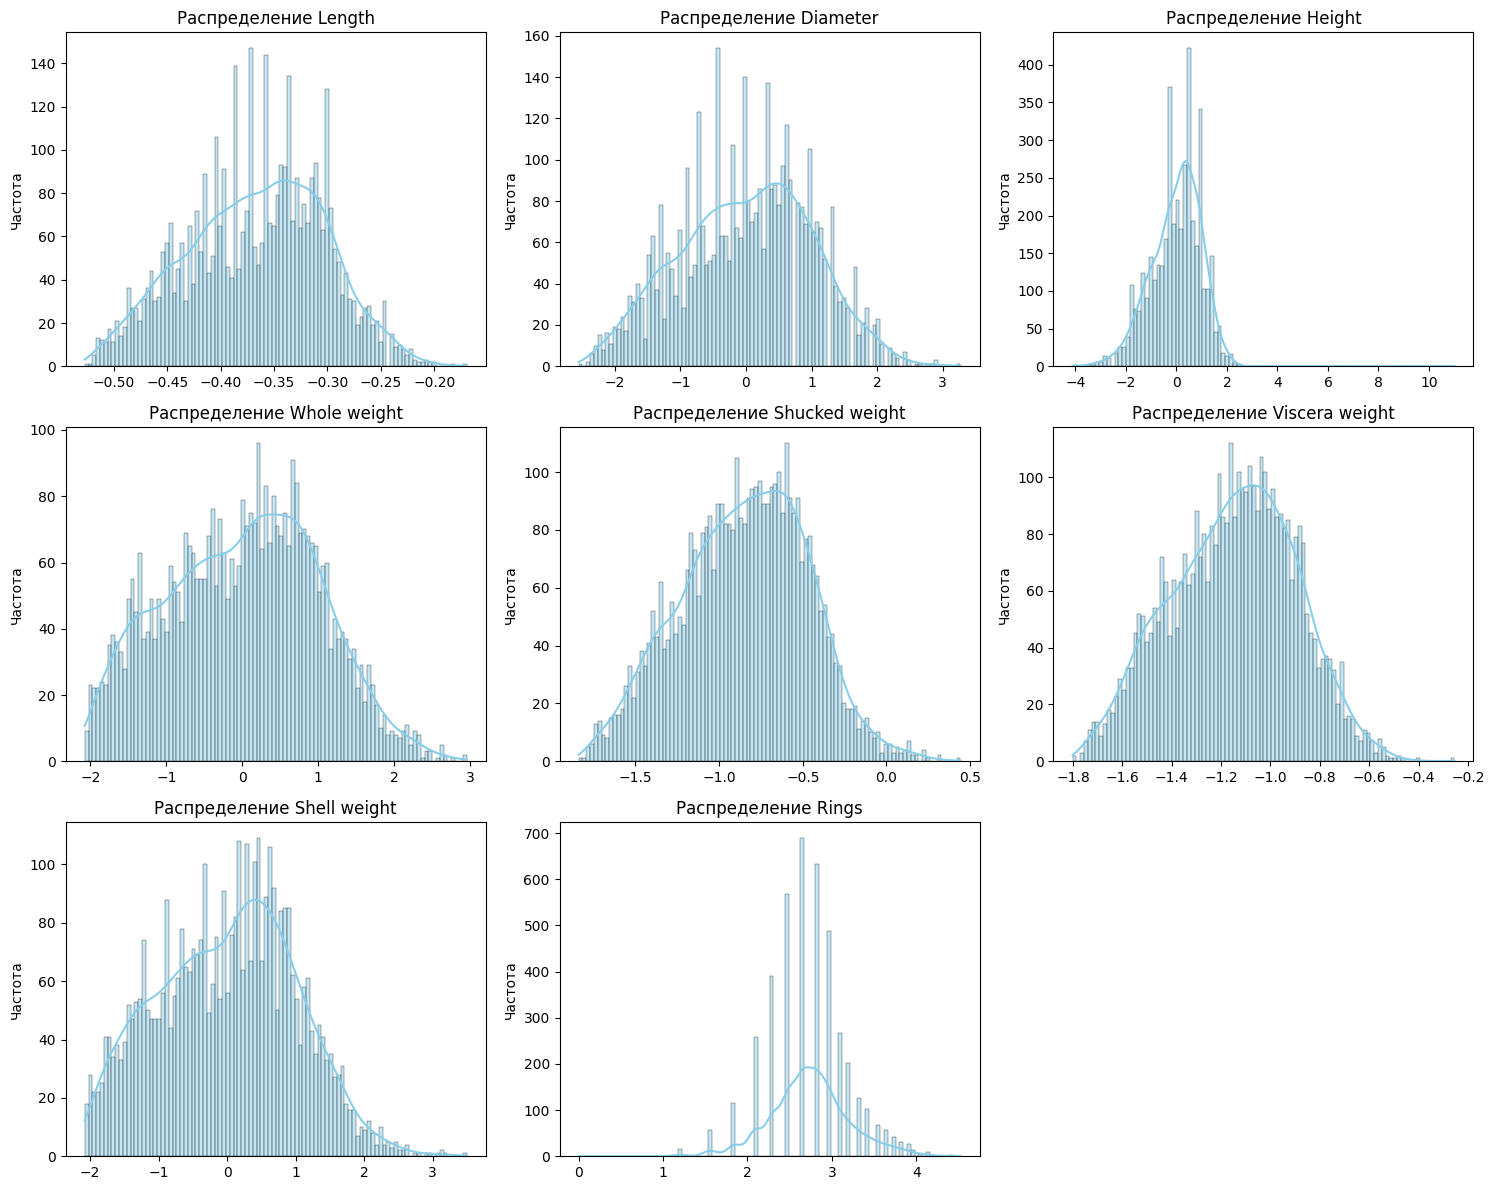

In [19]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Выбор числовых признаков
numeric_columns = df.select_dtypes(include=['number']).columns

# Преобразование данных к нормальному распределению
df_transformed = df.copy()
for col in numeric_columns:
    if (df[col] > 0).all():  # Box-Cox для положительных значений
        df_transformed[col], _ = boxcox(df[col] + 1e-6)
        print(f'Box-Cox применен к {col}')
    else:  # Yeo-Johnson для значений с нулями
        pt = PowerTransformer(method='yeo-johnson')
        df_transformed[col] = pt.fit_transform(df[[col]])
        print(f'Yeo-Johnson применен к {col}')

# Создание матрицы подграфиков
num_cols = len(numeric_columns)  # Количество признаков
rows = (num_cols + 2) // 3  # Количество строк (по 3 графика в строке)

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Матрица 3xN графиков
axes = axes.flatten()  # Разворачиваем массив осей для удобного итератора

# Построение гистограмм
for i, col in enumerate(numeric_columns):
    sns.histplot(df_transformed[col], kde=True, bins=100, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Частота')

# Удаляем пустые подграфики, если графиков меньше, чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Улучшаем компоновку графиков
plt.tight_layout()
plt.show()

# Вывод по графиком распределений после преобразования к нормальному распределению
* 75% - логнормальное распределение
* 25% - нормальное распределение

<h2>3. Построить матрицу корреляций</h2>

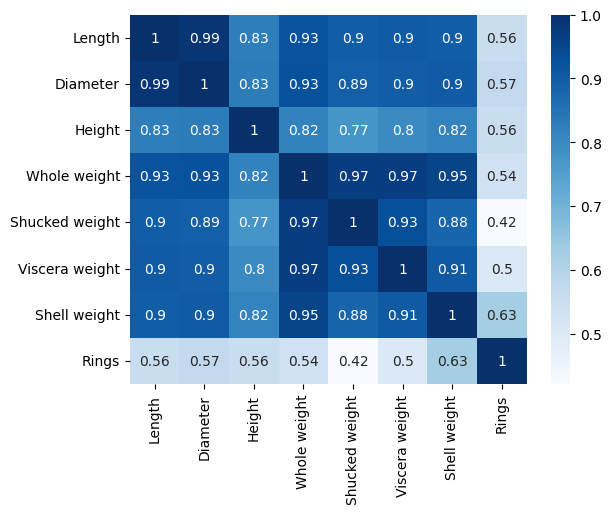

In [20]:
#корреляция Пирсона
corr_pirs = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr_pirs, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Пирсону
* Length, Diameter, Whole weight, Shucked weight, Viscera weight и Shell weight имеют коэффициенты корреляции выше 0.9 друг с другом. Это указывает на сильную линейную зависимость
* Умеренная связь между признаками и целевым значением Rings.

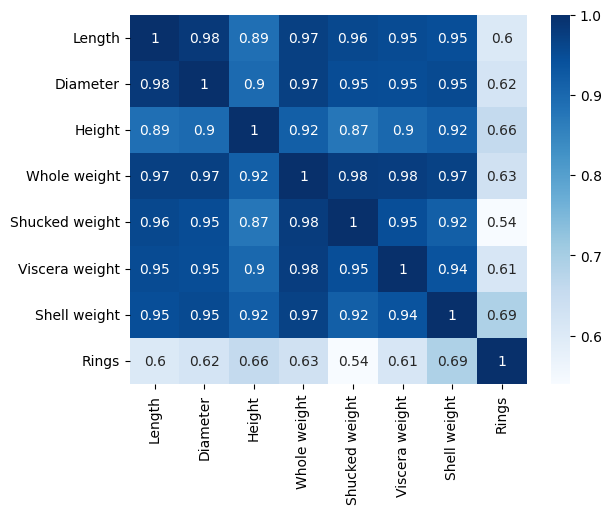

In [21]:
#Корреляция Спирмена
corr_spir = df.corr(method='spearman', numeric_only=True) # матрица корреляций
sns.heatmap(corr_spir, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Спирмену
* Корреляция Спирмена показала сильные монотонные связи между признаками.
* Целевой признак Rings наиболее коррелирует с Shell weight и Height, что можно использовать для построения модели.
* Высокая взаимозависимость между признаками требует сокращения размерности и обработки мультиколлинеарности

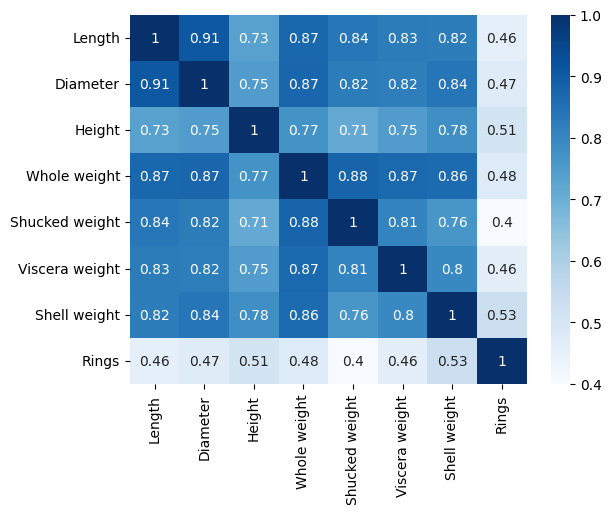

In [22]:
#Корреляция Кендалла
corr_kend = df.corr(method='kendall', numeric_only=True) # матрица корреляций
sns.heatmap(corr_kend, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Кендаллу
* Высокая связь между признаками, такими как Length, Diameter и Whole weight, указывает на потенциальную мультиколлинеарность.
* Целевой признак Rings имеет умеренную связь с Shell weight и Height.
* Рассмотреть Shell weight и Height как важные признаки для модели.

In [23]:
#построим V-меру Краммера для двух категоральных значений: Rings и Sex
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "int64" else x)

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Sex,Rings
Sex,1.000000,0.386311
Rings,0.386311,1.000000


# Вывод по V-мере Краммера между Sex и Rings
* Между Sex и Rings наблюдается слабая связь
* Переменная Sex может быть полезной при моделировании Rings, но не ключевой.

In [24]:
#проведем ANOVA между категоральными и численными значениями
from scipy.stats import f_oneway

corr_object = []

for c1 in df_cat.select_dtypes(include=['category']):
    for c2 in df_cat.select_dtypes(include=['float']):
        category_group_lists = df_cat.groupby(c1, observed=True)[c2].apply(list)
        anova_results = f_oneway(*category_group_lists)

        if anova_results[1] >= 0.05:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'No'})
        else:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'Yes'})

anova_general_result = pd.DataFrame.from_dict(corr_object)
anova_general_result

,category,numerical,is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Rings,Length,Yes
8,Rings,Diameter,Yes
9,Rings,Height,Yes


# Вывод по ANOVA
* Sex влияет на числовые признаки, поэтому данную переменную можно использовать для анализа и моделирования как категориальный фактор.
* Все числовые признаки имеют значимую связь с целевой переменной Rings, что делает их полезными предикторами для построения модели машинного обучения.

In [25]:
# Удаляем строки из df, которые есть в tails_df
df_cleaned = df.drop(tails_df.index)

# Проверяем размер исходного и очищенного DataFrame
print(f"Размер исходного DataFrame: {df.shape}")
print(f"Размер очищенного DataFrame: {df_cleaned.shape}")

Размер исходного DataFrame: (4177, 9)
Размер очищенного DataFrame: (3781, 9)


In [26]:
# Проверка на отсутствие хвостов в df_cleaned
# Фильтруем только числовые столбцы из df
numeric_columns = df.select_dtypes(include=['number']).columns

# Проверка на отсутствие хвостов в df_cleaned
print("Остались ли хвосты в очищенном DataFrame?")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col}: {len(remaining_outliers)} выбросов осталось")


Остались ли хвосты в очищенном DataFrame?
Length: 0 выбросов осталось
Diameter: 0 выбросов осталось
Height: 0 выбросов осталось
Whole weight: 0 выбросов осталось
Shucked weight: 0 выбросов осталось
Viscera weight: 0 выбросов осталось
Shell weight: 0 выбросов осталось
Rings: 0 выбросов осталось


In [27]:
#поиск пропусков
df_cleaned.isnull().mean()

Sex               0.000000
Length            0.000000
Diameter          0.022745
Height            0.000000
Whole weight      0.023274
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.012166
Rings             0.000000
dtype: float64

In [28]:
# #тк количество пропусков меньше процента, я решила заменить пропуски медианой
# for cols in df:
#     if df[cols].isnull().sum() != 0:
#         median = df[cols].median()
#         df[cols].fillna(median, inplace=True)

In [29]:
# Целевая переменная
target = 'Rings'

# Заполнение пропусков медианой относительно целевого признака
for col in df_cleaned.select_dtypes(include=['number']).columns:
    if col != target and df_cleaned[col].isnull().sum() > 0:  # Только числовые столбцы с пропусками
        df_cleaned[col] = df_cleaned.groupby(target)[col].transform(lambda x: x.fillna(x.median()))
        print(f'Пропуски в {col} заполнены медианами по группам {target}')

Пропуски в Diameter заполнены медианами по группам Rings
Пропуски в Whole weight заполнены медианами по группам Rings
Пропуски в Shell weight заполнены медианами по группам Rings


In [30]:
#поиск пропусков
df_cleaned.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [31]:
df_cleaned_norm = df_transformed.drop(tails_df.index)

In [32]:
#поиск пропусков
df_cleaned_norm.isnull().mean()

Sex               0.000000
Length            0.000000
Diameter          0.022745
Height            0.000000
Whole weight      0.023274
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.012166
Rings             0.000000
dtype: float64

In [33]:
# Целевая переменная
target = 'Rings'

# Заполнение пропусков медианой относительно целевого признака
for col in df_cleaned_norm.select_dtypes(include=['number']).columns:
    if col != target and df_cleaned_norm[col].isnull().sum() > 0:  # Только числовые столбцы с пропусками
        df_cleaned_norm[col] = df_cleaned_norm.groupby(target)[col].transform(lambda x: x.fillna(x.median()))
        print(f'Пропуски в {col} заполнены медианами по группам {target}')

Пропуски в Diameter заполнены медианами по группам Rings
Пропуски в Whole weight заполнены медианами по группам Rings
Пропуски в Shell weight заполнены медианами по группам Rings


In [34]:
df_cleaned_norm.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [35]:
zero_percentage = (df_cleaned == 0).sum() / len(df_cleaned) * 100

# Вывод результатов
print("Доля нулевых значений в процентах для каждого столбца:")
print(zero_percentage)

Доля нулевых значений в процентах для каждого столбца:
Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [36]:
# #height равных нулю меньше нуля, удалю их
# df_cleaned = df_cleaned[df_cleaned['Height'] > 0]

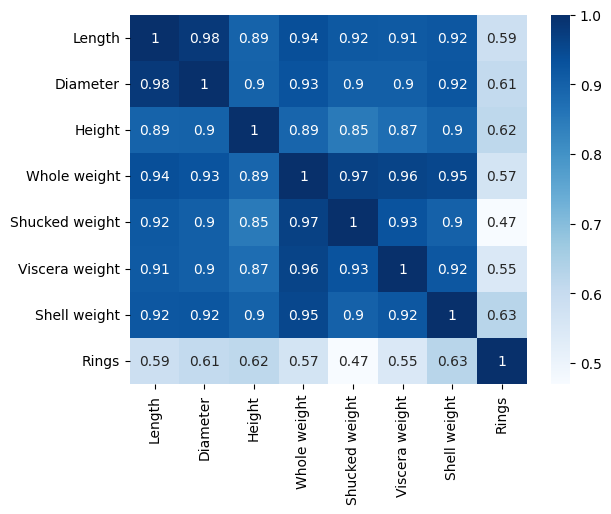

In [37]:
#корреляция Пирсона
corr_pirs = df_cleaned.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr_pirs, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Пирсону после обработки
1. Удаление выбросов и заполнение пропусков медианами улучшили надежность корреляционных оценок:
* Это привело к увеличению корреляций между целевым признаком Rings и другими числовыми признаками.
2. Самые влиятельные признаки для Rings:
* Shell weight (0.63)
* Height (0.62)
* Diameter (0.61)
3. Высокая корреляция между другими признаками (например, Whole weight и Length, Shucked weight, Viscera weight) осталась неизменной и свидетельствует о мультиколлинеарности.

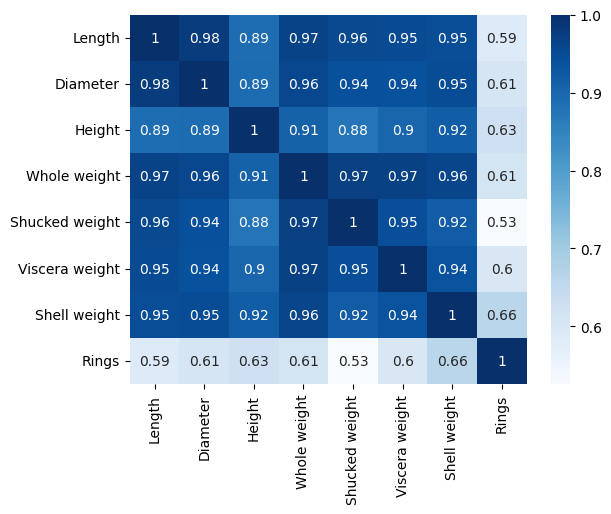

In [38]:
#Корреляция Спирмена
corr_spir = df_cleaned.corr(method='spearman', numeric_only=True) # матрица корреляций
sns.heatmap(corr_spir, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Спирмену после обработки
1. Корреляции усилились:
* Удаление выбросов и заполнение пропусков медианой привело к стабилизации зависимостей между признаками.
* Корреляции между Length, Diameter, Whole weight и Shell weight стали более надежными.
2. Целевой признак (Rings):
* Корреляция с целевым признаком улучшилась, особенно для Shell weight и Height, что говорит об их большем влиянии на Rings.
3. Влияние обработки данных:
* Обработка данных позволила уменьшить шум и улучшить качество корреляционных связей в наборе данных.

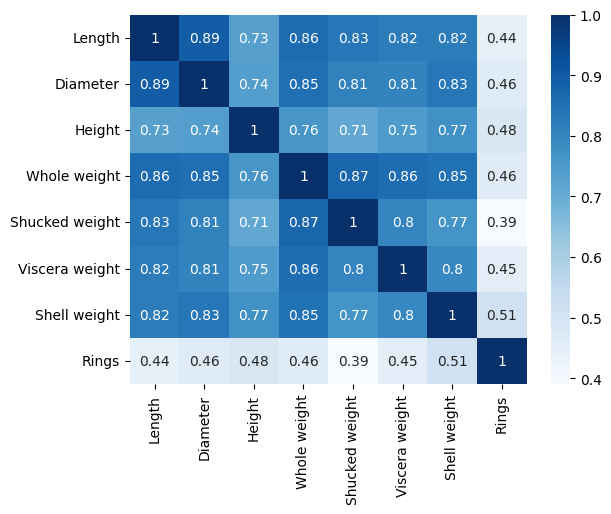

In [39]:
#Корреляция Кендалла
corr_kend = df_cleaned.corr(method='kendall', numeric_only=True) # матрица корреляций
sns.heatmap(corr_kend, cmap="Blues", annot=True);

# Вывод по матрице корреляций по Кендаллу после обработки
* Корреляции Кендалла снизились после обработки данных.
* Выбросы и нулевые значения оказывали влияние на зависимости между признаками.
* Снижение корреляции с целевым признаком указывает на более чистые данные, но возможно, также на более слабую связь после обработки.

# Итоговый вывод
В целом, данные подходят для машинного обучения

# Часть 2: ОБУЧЕНИЕ

1. Построение моделей на числовых признаках (минимум - NB и kNN, максимум - любые) с параметрами по умолчанию, вычисление метрик + комментарий о качестве моделей (1 балл).
2. Подбор гиперпараметров у каждой из моделей (только на числовых признаках) при помощи GridSearchCV + вычисление метрик для лучших найденных моделей + текстовый комментарий (3 балла).
3. Добавление категориальных признаков в лучшую модель, обучение модели и заново подбор ее гиперпараметров + вычисление метрик + текстовый комментарий (2 балла).
4. Построение Explainer Dashboard и сохранение файла с ним на GitHub (1 балл)
5. Анализ модели в Explainer Dashboard (выводы пишем в том же Jupyter Notebook):
* какие факторы наиболее важны в среднем для получения прогноза? (1 балл)
* какие значения метрик получились и что это значит? (1 балл)
* анализ 2-3 индивидуальных прогнозов с комментарием (1 балл)

In [40]:
from sklearn.exceptions import FitFailedWarning

# Отключение FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [41]:
df_cleaned['Rings'] = df_cleaned['Rings'].astype(float)

In [42]:
df_cleaned.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.51400,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.22550,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.67700,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,1.01125,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.20500,0.0895,0.0395,0.055,7.0


In [43]:
df_cleaned_norm.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.410616,-0.548449,-1.124512,-0.573241,-1.032279,-1.307483,-0.591502,3.426928
1,M,-0.457649,-1.386447,-1.264396,-1.347506,-1.331980,-1.480271,-1.337791,2.300617
2,F,-0.370467,0.009597,-0.064823,-0.194895,-0.969687,-1.201645,-0.100829,2.656242
3,M,-0.417995,-0.548449,-0.320227,0.483881,-1.050628,-1.271700,-0.548527,2.809846
4,I,-0.465370,-1.458889,-1.549424,-1.408829,-1.362329,-1.517456,-1.491239,2.300617


In [44]:
x = df_cleaned.drop(labels=['Rings'], axis=1)
x_norm = df_cleaned_norm.drop(labels=['Rings'], axis=1)
y = df_cleaned['Rings']
y_norm = df_cleaned_norm['Rings']

In [45]:
# df = pd.DataFrame(df_cleaned)

# # Сохранение в CSV
# df.to_csv('output.csv', index=False)  # index=False, чтобы не сохранять индексы в CSV

# print("Файл сохранен как 'output.csv'")

In [46]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 3781, dtype: float64

In [47]:
y_norm

0       3.426928
1       2.300617
2       2.656242
3       2.809846
4       2.300617
          ...   
4172    2.951154
4173    2.809846
4174    2.656242
4175    2.809846
4176    3.082143
Name: Rings, Length: 3781, dtype: float64

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3781 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3781 non-null   category
 1   Length          3781 non-null   float64 
 2   Diameter        3781 non-null   float64 
 3   Height          3781 non-null   float64 
 4   Whole weight    3781 non-null   float64 
 5   Shucked weight  3781 non-null   float64 
 6   Viscera weight  3781 non-null   float64 
 7   Shell weight    3781 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 240.1 KB


In [49]:
x_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3781 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3781 non-null   category
 1   Length          3781 non-null   float64 
 2   Diameter        3781 non-null   float64 
 3   Height          3781 non-null   float64 
 4   Whole weight    3781 non-null   float64 
 5   Shucked weight  3781 non-null   float64 
 6   Viscera weight  3781 non-null   float64 
 7   Shell weight    3781 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 240.1 KB


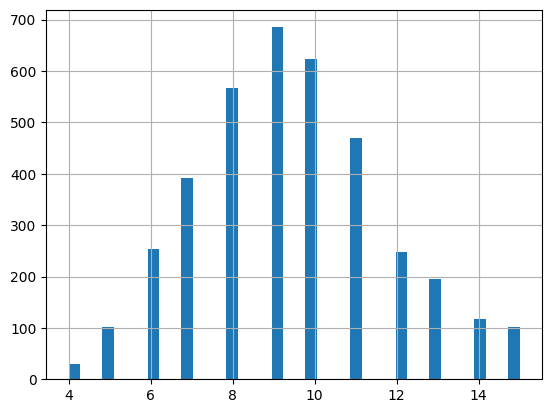

In [50]:
y.hist(bins=40);

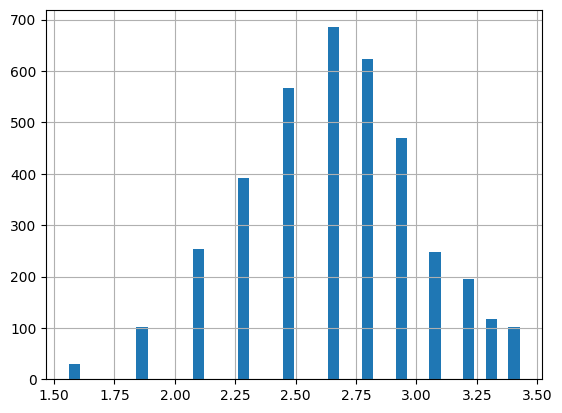

In [51]:
y_norm.hist(bins=40);

In [52]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from explainerdashboard import ClassifierExplainer, ExplainerDashboard


In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
import pandas as pd
import os

class MLPipeline:
    def __init__(self, dataset, target_column, task='classification', test_size=0.25, random_state=42):
        # Инициализация
        self.dataset = dataset
        self.target_column = target_column
        self.task = task
        self.X = dataset.drop(columns=[target_column])
        self.y = dataset[target_column]
        self.pipelines = []
        self.pipeline_names = []  # Для хранения имен моделей
        self.column_transformer = None
        self.best_model = None
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

    def create_column_transformer(self, numeric_features, categorical_features,
                                general_numeric_scaler=MinMaxScaler(),
                                specific_numeric_scalers=None,
                                general_categorical_encoder=OneHotEncoder(handle_unknown='ignore'),
                                specific_categorical_encoders=None,
                                numeric_imputer_strategy='mean',
                                categorical_imputer_strategy='most_frequent'):
        """
        Создает ColumnTransformer для обработки числовых и категориальных данных.

        :param numeric_features: список названий числовых столбцов
        :param categorical_features: список названий категориальных столбцов
        :param general_numeric_scaler: трансформер для большинства числовых столбцов (например, StandardScaler)
        :param specific_numeric_scalers: словарь {столбец: трансформер} для конкретных числовых столбцов
        :param general_categorical_encoder: трансформер для большинства категориальных столбцов
        :param specific_categorical_encoders: словарь {столбец: трансформер} для конкретных категориальных столбцов
        :param numeric_imputer_strategy: стратегия заполнения пропущенных числовых данных (по умолчанию 'mean')
        :param categorical_imputer_strategy: стратегия заполнения пропущенных категориальных данных (по умолчанию 'most_frequent')
        """
        # Проверка существования столбцов в наборе данных
        missing_numeric = [col for col in numeric_features if col not in self.X.columns]
        missing_categorical = [col for col in categorical_features if col not in self.X.columns]

        if missing_numeric:
            raise ValueError(f"Следующие числовые столбцы отсутствуют в данных: {missing_numeric}")
        if missing_categorical:
            raise ValueError(f"Следующие категориальные столбцы отсутствуют в данных: {missing_categorical}")

        # Разделение числовых столбцов
        specific_numeric_columns = set(specific_numeric_scalers.keys()) if specific_numeric_scalers else set()
        general_numeric_columns = [col for col in numeric_features if col not in specific_numeric_columns]

        # Разделение категориальных столбцов
        specific_categorical_columns = set(specific_categorical_encoders.keys()) if specific_categorical_encoders else set()
        general_categorical_columns = [col for col in categorical_features if col not in specific_categorical_columns]

        # Создание трансформеров для числовых столбцов
        numeric_transformers = []

        # Общий трансформер для большинства числовых столбцов
        if general_numeric_columns:
            numeric_transformers.append(
                ('num_general', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy=numeric_imputer_strategy)),
                    ('scaler', general_numeric_scaler)
                ]), general_numeric_columns)
            )

        # Специфические трансформеры для отдельных числовых столбцов
        if specific_numeric_scalers:
            for col, scaler in specific_numeric_scalers.items():
                numeric_transformers.append(
                    (f"num_{col}", Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy=numeric_imputer_strategy)),
                        ('scaler', scaler)
                    ]), [col])
                )

        # Создание трансформеров для категориальных столбцов
        categorical_transformers = []

        # Общий трансформер для большинства категориальных столбцов
        if general_categorical_columns:
            categorical_transformers.append(
                ('cat_general', Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy=categorical_imputer_strategy)),
                    ('encoder', general_categorical_encoder)
                ]), general_categorical_columns)
            )

        # Специфические трансформеры для отдельных категориальных столбцов
        if specific_categorical_encoders:
            for col, encoder in specific_categorical_encoders.items():
                categorical_transformers.append(
                    (f"cat_{col}", Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy=categorical_imputer_strategy)),
                        ('encoder', encoder)
                    ]), [col])
                )

        # Итоговый ColumnTransformer
        self.column_transformer = ColumnTransformer(
            transformers=numeric_transformers + categorical_transformers
        )

    def build_pipeline(self, models):
        """
        Создает пайплайны для каждой переданной модели, объединяя ColumnTransformer и модель.

        :param models: список моделей машинного обучения (например, объекты из scikit-learn)
        """
        if not self.column_transformer:
            raise ValueError("ColumnTransformer не создан. Вызовите create_column_transformer сначала.")

        self.pipelines = [
            Pipeline(steps=[
                ('preprocessor', self.column_transformer),
                ('model', model)
            ])
            for model in models
        ]

        # Сохраняем имена моделей
        self.pipeline_names = [type(model).__name__ for model in models]

    def train_pipelines(self):
        """
        Обучает каждый пайплайн на данных.

        :return: список обученных пайплайнов
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        for pipeline in self.pipelines:
            pipeline.fit(self.X_train, self.y_train)

        return self.pipelines

    def evaluate_pipelines(self):
        """
        Оценивает производительность каждого пайплайна на тестовых данных.

        :return: список словарей с метриками для каждого пайплайна
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Обучите их перед оценкой.")

        scores = [pipeline.score(self.X_test, self.y_test) for pipeline in self.pipelines]
        return [{"pipeline_index": i, "test_score": score} for i, score in enumerate(scores)]

    def cross_validate_pipelines(self, scoring, cv=4, return_train_score=False, n_jobs=-1):
        """
        Выполняет кросс-валидацию для всех пайплайнов по заданным метрикам.

        :param scoring: метрики для оценки (может быть строкой, списком или словарём)
        :param cv: количество фолдов для кросс-валидации (по умолчанию 4)
        :param n_jobs: количество процессов для выполнения (-1 для использования всех ядер)
        :return: список результатов кросс-валидации для каждого пайплайна
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        cv_results = []
        for i, pipeline in enumerate(self.pipelines):
            results = cross_validate(
                pipeline, self.X, self.y, scoring=scoring, cv=cv, return_train_score=return_train_score, n_jobs=n_jobs
            )
            cv_results.append({"pipeline_index": i, "cv_results": results})

        return cv_results

    def grid_search(self, param_grids, cv=5, scoring='accuracy', verbose=1, save_results_to=None):
        """
        Выполняет GridSearchCV для каждой модели в пайплайнах.

        :param param_grids: список словарей параметров для подбора, по одному на каждую модель
        :param cv: количество фолдов для кросс-валидации
        :param scoring: метрика для оценки (по умолчанию 'accuracy')
        :param verbose: уровень вывода информации
        :param save_results_to: путь для сохранения результатов (файл или DataFrame)
        :return: список объектов GridSearchCV
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        if len(self.pipelines) != len(param_grids):
            raise ValueError("Количество параметров в param_grids должно соответствовать количеству моделей в пайплайнах.")

        grid_searches = []
        for i, (pipeline, param_grid) in enumerate(zip(self.pipelines, param_grids)):
            grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid,
                cv=cv,
                scoring=scoring,
                verbose=verbose
            )
            grid_search.fit(self.X_train, self.y_train)
            grid_searches.append(grid_search)

            if save_results_to:
                results = pd.DataFrame(grid_search.cv_results_)
                save_path = f"{save_results_to}_{self.pipeline_names[i]}.csv" if isinstance(save_results_to, str) else None
                if save_path:
                    results.to_csv(save_path, index=False)

        return grid_searches

    def create_dashboard(self, pipeline_index=0, sample_size=None, save_path=None):
        """
        Создает и запускает ExplainerDashboard для указанного пайплайна.

        :param pipeline_index: индекс пайплайна, для которого будет создана панель (по умолчанию 0)
        """
        if not self.pipelines:
            raise ValueError("Пайплайны не созданы. Вызовите build_pipeline сначала.")

        if pipeline_index >= len(self.pipelines):
            raise ValueError(f"Индекс пайплайна {pipeline_index} превышает количество пайплайнов {len(self.pipelines)}.")

        # Ограничение выборки, если указано
        if sample_size is not None:
            X_sample = self.X_test.sample(n=sample_size, random_state=42)
            y_sample = self.y_test.loc[X_sample.index]
        else:
            X_sample = self.X_test
            y_sample = self.y_test

        # Обучение выбранного пайплайна, если это не было сделано
        selected_pipeline = self.pipelines[pipeline_index]
        selected_pipeline.fit(self.X_train, self.y_train)

        # Создание ExplainerDashboard
        if self.task == 'classification':
            explainer = ClassifierExplainer(selected_pipeline, X_sample, y_sample)
        elif self.task == 'regression':
            explainer = RegressionExplainer(selected_pipeline, X_sample, y_sample)
        else:
            raise ValueError("Некорректное значение задачи. Используйте 'classification' или 'regression'.")

        dashboard = ExplainerDashboard(explainer)
        if save_path:
            # Сохранение в HTML файл
            dashboard.save_html(save_path)
        else:
            dashboard.run()


In [54]:
# Инициализация класса с вашим датасетом df_cleaned
df_cleaned_ml = MLPipeline(df_cleaned, target_column='Rings', task='regression', random_state=42)
df_norm_cleaned_ml = MLPipeline(df_cleaned_norm, target_column='Rings', task='regression', random_state=42)


models = [
    KNeighborsRegressor(),
    LinearRegression(),
    CatBoostRegressor(verbose=0),
    GradientBoostingRegressor()
]

In [55]:
df_cleaned_ml.create_column_transformer(
    numeric_features=x.drop(labels=['Sex'], axis=1).columns,
    # categorical_features=['Sex'],
    categorical_features=[]
)

df_norm_cleaned_ml.create_column_transformer(
    numeric_features=x_norm.drop(labels=['Sex'], axis=1).columns,
    # categorical_features=['Sex'],
    categorical_features=[]
)

In [56]:
df_cleaned_ml.build_pipeline(models=models)
df_cleaned_ml.train_pipelines()
evaluation_results = df_cleaned_ml.evaluate_pipelines()

for result in evaluation_results:
    print(f"Pipeline {result['pipeline_index']}: Test Score = {result['test_score']}")
    
    
    
df_norm_cleaned_ml.build_pipeline(models=models)
df_norm_cleaned_ml.train_pipelines()
evaluation_results = df_norm_cleaned_ml.evaluate_pipelines()

for result in evaluation_results:
    print(f"Pipeline {result['pipeline_index']}: Test Score = {result['test_score']}")

Pipeline 0: Test Score = 0.4763186760039271
Pipeline 1: Test Score = 0.5212542643983856
Pipeline 2: Test Score = 0.5508780962615787
Pipeline 3: Test Score = 0.5461764107651722
Pipeline 0: Test Score = 0.5312689693737309
Pipeline 1: Test Score = 0.5330248379491598
Pipeline 2: Test Score = 0.5889476442544457
Pipeline 3: Test Score = 0.5848336209931189


In [57]:
from sklearn.model_selection import cross_validate
# перечисляем список метрик для задачи регрессии
scoring = [
    'neg_mean_squared_error',             # MSE
    'neg_root_mean_squared_error',        # RMSE
    'neg_mean_absolute_error',            # MAE
    'neg_median_absolute_error',          # MedAE
    'r2',                                 # R²
    'neg_mean_absolute_percentage_error', # MAPE
    'explained_variance'                  # Explained Variance
]

from sklearn.model_selection import cross_validate
import pandas as pd


cv_cleaned = df_cleaned_ml.cross_validate_pipelines(scoring=scoring, cv=4, n_jobs=-1)
cv_norm_cleaned = df_norm_cleaned_ml.cross_validate_pipelines(scoring=scoring, cv=4, n_jobs=-1)

In [58]:
df_norm_cleaned_ml.pipelines[0]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_general',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight'])])),
                ('model', KNeighborsRegressor())])

In [59]:
# print(df_norm_cleaned_ml.X_train.isnull().sum())
# print(df_norm_cleaned_ml.X_test.isnull().sum())

In [60]:
# from sklearn.metrics import mean_squared_error


# y_pred_catboost = df_norm_cleaned_ml.pipelines[2].predict(df_norm_cleaned_ml.X_test)
# y_pred_gb = df_norm_cleaned_ml.pipelines[3].predict(df_norm_cleaned_ml.X_test)

# print("CatBoost MSE:", mean_squared_error(df_norm_cleaned_ml.y_test, y_pred_catboost))
# print("Gradient Boosting MSE:", mean_squared_error(df_norm_cleaned_ml.y_test, y_pred_gb))

In [61]:
# print(df_norm_cleaned_ml.pipelines[2].steps)
# print(df_norm_cleaned_ml.pipelines[3].steps)

In [62]:
def convert_cv_results_to_dataframe(cv_results_list, pipeline_names):
    """
    Преобразует список результатов кросс-валидации в DataFrame с метриками по строкам и моделями по столбцам.

    Args:
        cv_results_list: Список результатов кросс-валидации. Каждый элемент - словарь с pipeline_index и cv_results.
        pipeline_names: Список имен пайплайнов (из MLPipeline.pipeline_names).

    Returns:
        DataFrame, где строки - метрики, а столбцы - пайплайны.
    """
    results_dict = {}

    for result in cv_results_list:
        pipeline_index = result['pipeline_index']
        cv_results = result['cv_results']

        # Имя модели
        model_name = pipeline_names[pipeline_index]

        # Средние значения метрик для текущей модели
        results_dict[model_name] = {metric: cv_results[metric].mean() for metric in cv_results.keys()}

    # Преобразуем словарь в DataFrame
    df = pd.DataFrame(results_dict)
    return df




# names = ['knn', 'linreg']
# metrics = ['test_r2', 'test_neg_mean_squared_error', 'train_r2']

tb = convert_cv_results_to_dataframe(cv_cleaned, pipeline_names=df_cleaned_ml.pipeline_names)
tb_norm = convert_cv_results_to_dataframe(cv_norm_cleaned, pipeline_names=df_norm_cleaned_ml.pipeline_names)


In [63]:
tb

,KNeighborsRegressor,LinearRegression,CatBoostRegressor,GradientBoostingRegressor
fit_time,0.008972,0.007737,2.072077,0.440389
score_time,0.012214,0.006240,0.012176,0.007977
test_neg_mean_squared_error,-3.057476,-2.883337,-2.638518,-2.670493
test_neg_root_mean_squared_error,-1.733690,-1.685503,-1.612513,-1.620297
test_neg_mean_absolute_error,-1.337618,-1.316358,-1.254142,-1.263088
test_neg_median_absolute_error,-1.050000,-1.081854,-1.029133,-1.030024
test_r2,0.422010,0.450977,0.498988,0.495426
test_neg_mean_absolute_percentage_error,-0.144110,-0.142377,-0.135176,-0.136165
test_explained_variance,0.450683,0.491653,0.524216,0.533216


In [64]:
tb_norm

,KNeighborsRegressor,LinearRegression,CatBoostRegressor,GradientBoostingRegressor
fit_time,0.011619,0.008197,0.863574,0.406623
score_time,0.019916,0.007468,0.003960,0.007705
test_neg_mean_squared_error,-0.068228,-0.068415,NaN,-0.060005
test_neg_root_mean_squared_error,-0.259456,-0.259719,NaN,-0.243137
test_neg_mean_absolute_error,-0.203168,-0.204248,NaN,-0.192303
test_neg_median_absolute_error,-0.166347,-0.169905,NaN,-0.162848
test_r2,0.493031,0.492869,NaN,0.555870
test_neg_mean_absolute_percentage_error,-0.076747,-0.077788,NaN,-0.072702
test_explained_variance,0.516370,0.521190,NaN,0.584288


Сравнив два датасета (до и после нормализации) на 4 методах регресии, можно сделать вывод, что новый датасет показвывает себя немного лучше. Лучшей моделью является градиентный бустинг, так как метрика $r^2$ больше, чем у других методов. Также для градиентного бустинга MAPE по модулю меньше, чем у других моделей для нового датасета. По остальным метрикам градиентный бустинг также лучше проявляет себя. Можно сказать, что модели ведут себя примерно одинаково с датасетами до и после нормализации.

In [65]:
param_grids = [
    {
        'model__n_neighbors': np.arange(2, 20, 2),
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {
        'model__fit_intercept': [True, False],  # Включение/выключение перехвата
        'model__n_jobs': [None, -1]  # Количество потоков для вычислений
    },
    {
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__depth': [4, 6, 8],
        'model__iterations': [100, 300, 500]
    },
    {
        'model__n_estimators': [1, 50, 100],
        'model__max_depth': [3, 4, 5],
        'model__learning_rate': [0.1, 0.01, 0.001]
    }
]

In [66]:
grid_search_results = df_cleaned_ml.grid_search(param_grids=param_grids)
for i, gs in enumerate(grid_search_results):
    print(f"Best parameters for pipeline {i}: {gs.best_params_}")

grid_search_norm_results = df_norm_cleaned_ml.grid_search(param_grids=param_grids, cv=4, scoring='neg_mean_absolute_percentage_error')
for i, gs in enumerate(grid_search_norm_results):
    print(f"Best parameters for pipeline {i}: {gs.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for pipeline 0: {'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}
Best parameters for pipeline 1: {'model__fit_intercept': True, 'model__n_jobs': None}
Best parameters for pipeline 2: {'model__depth': 4, 'model__iterations': 100, 'model__learning_rate': 0.01}
Best parameters for pipeline 3: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 1}
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best parameters for pipeline 0: {'model__n_neighbors': 18, 'model__p': 1, 'model__weights': 'distance

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def calculate_metrics(gss, x_test, y_test, column_names, model_names):
    results = []
    for gs in gss:
        pred = gs.best_estimator_.predict(x_test)

        # Рассчитываем метрики
        mse = mean_squared_error(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred)
        r2 = r2_score(y_test, pred)

        results.append([mse, mae, mape, r2])

    # Создаем DataFrame из результатов
    metrics_df = pd.DataFrame(results, columns=column_names, index=model_names)
    return metrics_df

# Пример использования:
# gss = grid_search_norm_results
# model_names = df_norm_cleaned_ml.pipeline_names
columns_metrics = ['MSE', 'MAE', 'MAPE', 'R2']

metrics_df = calculate_metrics(grid_search_results, df_cleaned_ml.X_test, df_cleaned_ml.y_test, columns_metrics, df_cleaned_ml.pipeline_names)
metrics_df_norm = calculate_metrics(grid_search_norm_results, df_norm_cleaned_ml.X_test, df_norm_cleaned_ml.y_test, columns_metrics, df_norm_cleaned_ml.pipeline_names)

In [68]:
grid_search_norm_results[3]

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_general',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole '
                                                                          'weight',
                                                                          'Shucked '
                                                                          'weight',
                                                                          'Viscera '
                                                                          'weight',
                                                                          'Shell '
                                                                          'weight'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.001],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [1, 50, 100]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [69]:
metrics_df

,MSE,MAE,MAPE,R2
KNeighborsRegressor,3.668605,1.468288,0.159859,0.345219
LinearRegression,2.682315,1.268542,0.139131,0.521254
CatBoostRegressor,3.506465,1.503335,0.171008,0.374158
GradientBoostingRegressor,5.132509,1.840684,0.218434,0.083938


In [70]:
metrics_df_norm

,MSE,MAE,MAPE,R2
KNeighborsRegressor,0.061642,0.195378,0.074218,0.566492
LinearRegression,0.066401,0.201505,0.077396,0.533025
CatBoostRegressor,0.057772,0.188952,0.072063,0.593709
GradientBoostingRegressor,0.059973,0.192674,0.073366,0.578231


Все модели показывают значительно лучшие результаты после нормализации. $MSE$, $MAE$, $MAPE$ уменьшаются, а $R^2$ увеличивается. Для новых данных CatBoostRegressor и GradientBoostingRegressor показывают лучшие результаты по всем метрикам: $MSE$ и $MAE$ минимальны, $R^2$ находится в диапазоне 0.6, что указывает на хорошую объясняющую способность моделей. Далее будем работать с нормализированными данными.

In [71]:
df_norm_cleaned_ml.create_column_transformer(
    numeric_features=x_norm.drop(labels=['Sex'], axis=1).columns,
    categorical_features=['Sex'],
)

In [72]:
df_norm_cleaned_ml.build_pipeline(models=models)
df_norm_cleaned_ml.train_pipelines()
evaluation_results = df_norm_cleaned_ml.evaluate_pipelines()

for result in evaluation_results:
    print(f"Pipeline {result['pipeline_index']}: Test Score = {result['test_score']}")

Pipeline 0: Test Score = 0.5374604472456981
Pipeline 1: Test Score = 0.5536863470713205
Pipeline 2: Test Score = 0.6057053931991511
Pipeline 3: Test Score = 0.6018615763476808


In [73]:
cv_norm_cleaned = df_norm_cleaned_ml.cross_validate_pipelines(scoring=scoring, cv=4, n_jobs=-1)

In [74]:
tb_norm = convert_cv_results_to_dataframe(cv_norm_cleaned, pipeline_names=df_norm_cleaned_ml.pipeline_names)

In [75]:
tb_norm

,KNeighborsRegressor,LinearRegression,CatBoostRegressor,GradientBoostingRegressor
fit_time,0.013088,0.008725,0.339256,0.356617
score_time,0.018907,0.006826,0.002413,0.007426
test_neg_mean_squared_error,-0.066979,-0.066245,NaN,-0.057789
test_neg_root_mean_squared_error,-0.257323,-0.255800,NaN,-0.238815
test_neg_mean_absolute_error,-0.201939,-0.200877,NaN,-0.188553
test_neg_median_absolute_error,-0.168621,-0.165858,NaN,-0.159625
test_r2,0.501135,0.507142,NaN,0.570919
test_neg_mean_absolute_percentage_error,-0.076246,-0.076496,NaN,-0.071238
test_explained_variance,0.518659,0.526981,NaN,0.592021


In [76]:
grid_search_norm_results = df_norm_cleaned_ml.grid_search(param_grids=param_grids, cv=4, scoring='neg_mean_absolute_percentage_error')
for i, gs in enumerate(grid_search_norm_results):
    print(f"Best parameters for pipeline {i}: {gs.best_params_}")

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best parameters for pipeline 0: {'model__n_neighbors': 18, 'model__p': 2, 'model__weights': 'distance'}
Best parameters for pipeline 1: {'model__fit_intercept': True, 'model__n_jobs': None}
Best parameters for pipeline 2: {'model__depth': 4, 'model__iterations': 300, 'model__learning_rate': 0.1}
Best parameters for pipeline 3: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}


In [77]:
grid_search_norm_results[3]

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_general',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole '
                                                                          'weight',
                                                                          'Shucked '
                                                                          'weight',
                                                                          'Viscera '
                                                                          'weight',
                                                                          'Shell '
                                                                          'weight']),
                                                                        ('cat_general',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.001],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [1, 50, 100]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [78]:
gss = grid_search_norm_results
model_names = df_norm_cleaned_ml.pipeline_names
columns_metrics = ['MSE', 'MAE', 'MAPE', 'R2']
metrics_df_norm = calculate_metrics(gss, df_norm_cleaned_ml.X_test, df_norm_cleaned_ml.y_test, columns_metrics, model_names)

In [79]:
metrics_df_norm

,MSE,MAE,MAPE,R2
KNeighborsRegressor,0.059880,0.191259,0.072905,0.578881
LinearRegression,0.063463,0.195667,0.075192,0.553686
CatBoostRegressor,0.056087,0.186201,0.071088,0.605558
GradientBoostingRegressor,0.056650,0.187144,0.071184,0.601603


Добавление категориального признака не привело к значительным изменениям метрик. CatBoostRegressor и GradientBoostingRegressor остаются лучшими моделями для этой задачи с очень схожими результатами. Так как значение $R^2$ для CatBoostRegressor наивысшие, то постоим для него дешборд и по нему ответим на вопросы.

In [ ]:
df_norm_cleaned_ml.create_dashboard(
    pipeline_index=2,
)

### 1. какие факторы наиболее важны в среднем для получения прогноза? (1 балл)
В среднем наиболее важными факторами являются Shell weight и Shucked weight. Они оказывают наибольшее влияние на результат
### 2. какие значения метрик получились и что это значит? (1 балл)
* MSE (Mean Squared Error) — Среднеквадратичная ошибка. Измеряет средний квадрат разности между фактическими и предсказанными значениями. Чем меньше значение MSE, тем лучше модель предсказывает данные. Значение: 0.056087
* MAE (Mean Absolute Error) — Средняя абсолютная ошибка. Измеряет среднее абсолютное отклонение между фактическими и предсказанными значениями. MAE показывает среднюю величину ошибки в тех же единицах измерения, что и целевая переменная. Чем меньше значение MAE, тем лучше модель предсказывает данные. Значение: 0.186201
* MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка. Измеряет среднюю ошибку в процентах от фактического значения. MAPE показывает, на сколько процентов предсказанные значения отличаются от фактических. Чем меньше значение MAPE, тем лучше модель предсказывает данные. Значение: 0.071088
* R2 (R-squared) - Коэффициент детерминации. Измеряет долю вариации целевой переменной, которая объясняется моделью. Чем больше значение R2, тем лучше модель предсказывает данные. Значение: 0.605558
### 3. анализ 2-3 индивидуальных прогнозов с комментарием (1 балл)
* прогноз 1131 (Predicted 2.582, Observed 2.488, Residual -0.094) Абсолютная ошибка маленькая. Наиболее значимые признаки: Shucked weight, Whole weight, Shell weight
* прогноз 0 (Predicted 2.538, Observed 2.538, Residual 0.889) Абсолютная ошибка большая. Наиболее значимые признаки: Shell weight, Viscera weight, Whole weight
